In [31]:
#importar dados de usd
from bcb import currency
from bcb import sgs
import numpy as np

# Importing Packages
import yfinance as yf
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm


In [15]:
#criando um dataframe com dados diários do dolar
usd = currency.get(['USD'], start='2019-01-01', end='2022-07-14')
usd['vol_dif']=(usd['USD']-usd['USD'].shift(1))/usd['USD'].shift(1)
usd['vol_var']=np.sqrt(np.var(usd['USD']))
usd['vol_mod']=np.sqrt(((usd['USD']-usd['USD'].shift(1))/usd['USD'].shift(1))**2)
usd.head(2)

,USD,vol_dif,vol_var,vol_mod
Date,,,,
2019-01-02,3.8595,NaN,0.667316,NaN
2019-01-03,3.7683,-0.02363,0.667316,0.02363


In [18]:
usd.dropna(inplace=True)

<Figure size 1080x432 with 0 Axes>

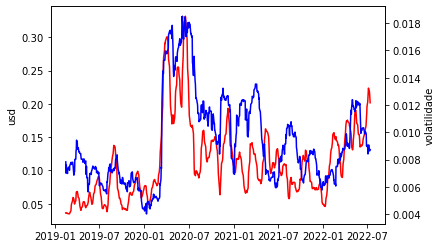

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Conjunto de dados para teste

width = 0.4

# Cria figura com eixo Y na esquerda (padrão), e plota dados nele
plt.figure(figsize=(15, 6))
figure, left_ax = plt.subplots()
left_ax.plot(usd.index, usd.USD.rolling(window=30).std(), color='red')
left_ax.set_ylabel('usd')

# Cria eixo Y na direita e plota dados nele
right_ax = left_ax.twinx()
right_ax.plot(usd.index, usd.vol_dif.rolling(window=30).std(), color='blue')
right_ax.set_ylabel('volatilidade')

# Mostra o gráfico
plt.show()

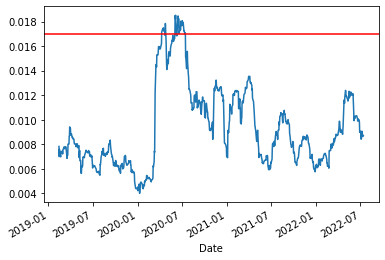

In [43]:
media_movel_vol=usd.vol_dif.rolling(window=30).std()
media_movel_vol.plot()
plt.axhline(y = 0.017, color = 'r', linestyle = '-');

In [82]:
import datetime

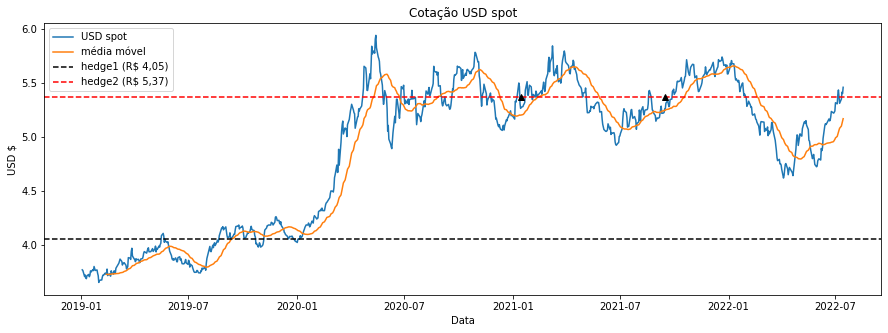

In [88]:
plt.figure(figsize=(15,5))
plt.plot(usd.index,usd.USD)
media_movel_vol=usd.USD.rolling(window=30).mean()
plt.plot(usd.index, media_movel_vol)
#ponto de hedge 
plt.axhline(y = 4.05 , color = 'black', linestyle = '--')


#ponto de colheita
plt.axhline(y = 5.37 , color = 'r', linestyle = '--')
plt.plot(datetime.date(2021,1,15), 5.37, marker='^', color="black")
plt.plot(datetime.date(2021,9,15), 5.37, marker='^', color="black")
plt.xlabel('Data')
plt.ylabel('USD $')
plt.title('Cotação USD spot')
plt.legend(['USD spot','média móvel','hedge1 (R$ 4,05)','hedge2 (R$ 5,37)']);

#### Monte Carlo

In [26]:
# Create Day Count, Price, and Change Lists
days = [i for i in range(1, len(usd['USD'])+1)]
price_orig = usd['USD'].tolist()
change = usd['USD'].pct_change().tolist()
change = change[1:]  # Removing the first term since it is NaN

# Statistics for Use in Model
mean = np.mean(change)
std_dev = np.std(change)
print('\nMean percent change: ' + str(round(mean*100, 2)) + '%')
print('Standard Deviation of percent change: ' +   
      str(round(std_dev*100, 2)) + '%')


Mean percent change: 0.05%
Standard Deviation of percent change: 0.99%


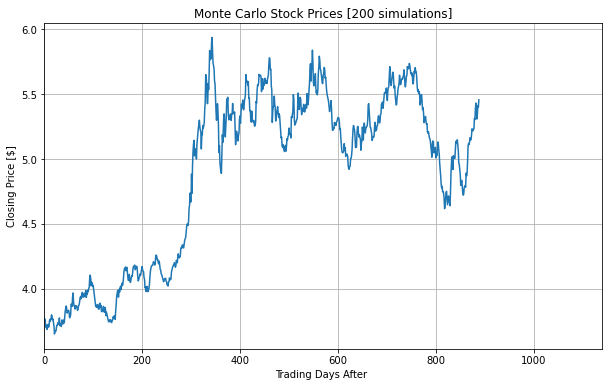

In [29]:
# Simulation Number and Prediction Period
#start_date=usd.index.min()
simulations = 200 # Change for more results
days_to_sim = 1*252 # Trading days in 1 year

# Initializing Figure for Simulation
fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + 
          " simulations]")
plt.xlabel("Trading Days After ") #+ start_date)
plt.ylabel("Closing Price [$]")
plt.xlim([0, len(days)+days_to_sim])
plt.grid()

# Initializing Lists for Analysis
close_end = []
above_close = []

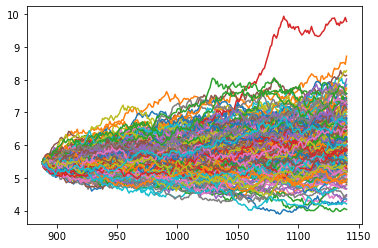

In [34]:
# For Loop for Number of Simulations Desired
for i in range(simulations):
    num_days = [days[-1]]
    close_price = [usd.iloc[-1,0]]
    
    # For Loop for Number of Days to Predict
    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1]*(1+perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    plt.plot(num_days, close_price)


Predicted closing price after 200 simulations: $42.58
Predicted percent increase after 1 year: 680.35%
Probability of stock price increasing after 1 year: 514.0%


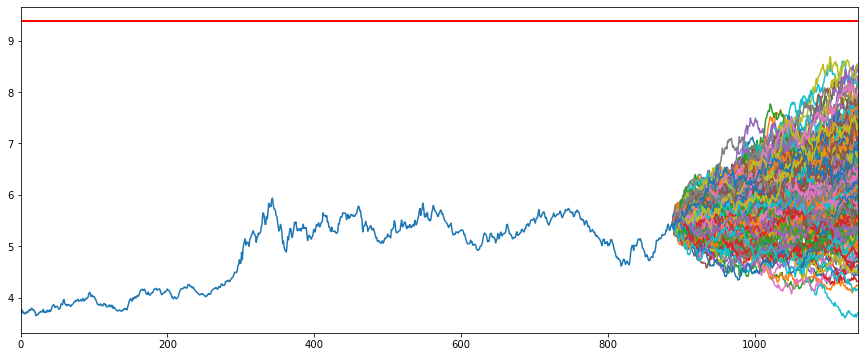

In [60]:
# Average Closing Price and Probability of Increasing After 1 Year

# Simulation Number and Prediction Period
simulations = 200 # Change for more results
days_to_sim = 1*252 # Trading days in 1 year



average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price-
                       price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulations
print('\nPredicted closing price after ' + str(simulations) + 
      ' simulations: $' + str(round(average_closing_price, 2)))
print('Predicted percent increase after 1 year: ' + 
      str(round(average_perc_change*100, 2)) + '%')
print('Probability of stock price increasing after 1 year: ' + 
      str(round(probability_of_increase*100, 2)) + '%')

# Displaying the Monte Carlo Simulation Lines
#plt.plot(num_days, close_price)
fig = plt.figure(figsize=[15, 6])
plt.plot(days, price_orig)
plt.xlim([0, len(days)+days_to_sim])

for i in range(simulations):
    num_days = [days[-1]]
    close_price = [usd.iloc[-1, 0]]
    
    # For Loop for Number of Days to Predict
    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1]*(1+perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    plt.plot(num_days, close_price)
    plt.axhline(y = 9.37, color = 'r', linestyle = '-')
#plt.show()

##### Monte Carlo 2

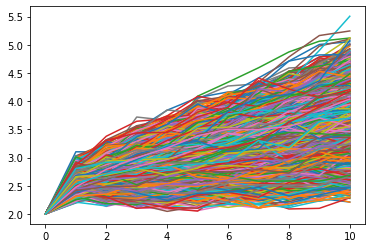

In [66]:
no_of_iter = 10000
delta_t = 1
revenues = []
gross_profits = []
for i in range(no_of_iter):
    revenue = [5]
    mu = 0.02
    sigma = 0.025
    fixed_cost = [2]
    var_cost = [1]
    np.random.seed(i)
    for j in range(10):
        revenue.append(revenue[j]*np.exp((mu-sigma**2/2)*(delta_t) + sigma*np.sqrt(delta_t)*np.random.normal()))
        fixed_cost.append(fixed_cost[j])
        var_cost.append(revenue[j]*0.1)
        gross_profit = [x - y - z for x, y, z in zip(revenue, fixed_cost, var_cost)]
    revenues.append(revenue)
    gross_profits.append(gross_profit)
gross_profits = np.array(gross_profits)
gross_profits.mean(axis=0)
plt.plot(np.array(gross_profits).T);